***Table of Contents***


1.   Overview of Problem Statement
2.   Objective
3.   Data Collection
4.   Data Description
5.   Exploratory Data Analysis (EDA)
6.   Data Preprocessing
7.   Visualization
8.   Feature Engineering
9.   Data Splitting
10.  Model Selection
11.  Model Training & Evaluation
12.  Feature Selection
13.  Model Evaluation
14.  Hyperparameter Tuning
15.  Result
16.   Model Deployment
17.   Limitations
18.   Conclusion
19.   Future Work
20.   List item




























# **1.Overview of Problem Statement**

You have a dataset containing information about movies, including their revenues, budgets, distributors, MPAA ratings, genres, and other details. You aim to predict a specific target variable related to the movies using various machine learning models.

# **2.Objective**



*   Preprocess the Data: Handle missing values, convert data types, and encode categorical variables.
*   Feature Engineering: Create relevant features for the models.
*   Model Training: Train multiple machine learning models including Logistic Regression, Random Forest, Decision Tree, Naive Bayes, and Support Vector Classifier (SVC).
*   Model Evaluation: Evaluate the performance of the models using appropriate metrics.





# **3. Data collection**

### *Importing Libraries and Dataset*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')



### Now load the dataset into the panda’s data frame.

In [71]:
BoxOffice_df = pd.read_csv('/boxoffice.csv',
				encoding='latin-1')
BoxOffice_df.head()


,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


# **4. Data Description**

Data Source : kaggle.com

### Dataset






### The dataset includes various features:



1.   title: The title of the movie.
2.   domestic_revenue: The revenue generated by the movie in the domestic market.
3.  world_revenue: The total revenue generated by the movie worldwide.
4.   distributor: The company responsible for distributing the movie.
5.   opening_revenue: The revenue generated by the movie during its opening weekend.
6.   opening_theaters: The number of theaters in which the movie was released during its opening weekend.
7.  budget: The production budget of the movie.
8.   MPAA: The Motion Picture Association of America (MPAA) rating of the movie.
9.   genres: The genres associated with the movie.
10.   release_days: The number of days the movie was in release.











### Dataset Size



Number of records: The total number of records in the dataset is 2694.

Number of features: 10

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
BoxOffice_df

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290
...,...,...,...,...,...,...,...,...,...,...
2689,Get Out,"$176,040,665","$255,407,969",Universal Pictures,"$33,377,060","2,781","$4,500,000",R,"Horror,Mystery,Thriller",676
2690,The Lego Batman Movie,"$175,750,384","$311,950,384",Warner Bros.,"$53,003,468","4,088","$80,000,000",PG,"Action,Animation,Comedy,Family",325
2691,Coco,"$209,726,015","$807,082,196",Walt Disney Studios Motion Pictures,"$50,802,605","3,987",NaN,PG,"Adventure,Animation,Family,Fantasy,Music,Mystery",405
2692,Dunkirk,"$188,045,546","$525,245,546",Warner Bros.,"$50,513,488","3,720","$100,000,000",PG-13,"Action,Drama,History,Thriller,War",168


# 5. Exploratory Data Analysis(EDA)

In [74]:
BoxOffice_df.shape


(2694, 10)

### which column of the dataset contains which type of data.

In [75]:
BoxOffice_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


In [76]:
# columns
BoxOffice_df.columns

Index(['title', 'domestic_revenue', 'world_revenue', 'distributor',
       'opening_revenue', 'opening_theaters', 'budget', 'MPAA', 'genres',
       'release_days'],
      dtype='object')

In [77]:
BoxOffice_df.columns=BoxOffice_df.columns.str.replace(" ","")
BoxOffice_df.columns

Index(['title', 'domestic_revenue', 'world_revenue', 'distributor',
       'opening_revenue', 'opening_theaters', 'budget', 'MPAA', 'genres',
       'release_days'],
      dtype='object')

Identifying numerical and categorical columns

In [78]:
# Numerical columns
num_cols = BoxOffice_df.select_dtypes(include='float').columns
print(num_cols)

Index([], dtype='object')


In [79]:
cat_cols = BoxOffice_df.select_dtypes(include='object').columns
print(cat_cols )

Index(['title', 'domestic_revenue', 'world_revenue', 'distributor',
       'opening_revenue', 'opening_theaters', 'budget', 'MPAA', 'genres',
       'release_days'],
      dtype='object')


Out of 10 columns, 10 are categorical.


Checking for null values

In [80]:
# finding missing values
BoxOffice_df.isnull().sum()


,0
title,0
domestic_revenue,0
world_revenue,0
distributor,0
opening_revenue,304
opening_theaters,311
budget,2297
MPAA,1469
genres,39
release_days,0


In [81]:
# Percentage of missing values in each column
BoxOffice_df.isnull().sum()/df.shape[0]*100

,0
title,0.000000
domestic_revenue,0.000000
world_revenue,0.000000
distributor,0.000000
opening_revenue,11.284336
opening_theaters,11.544172
budget,85.263549
MPAA,54.528582
genres,1.447661
release_days,0.000000


If percentage of missing values is greater than 50%, we can drop that columns.

Checking for Duplicates

In [82]:
# finding duplicates
BoxOffice_df.duplicated().sum()

189

There are duplicate values

## Understand the distribution of data

In [83]:
# Descriptive statistics
BoxOffice_df.describe().T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


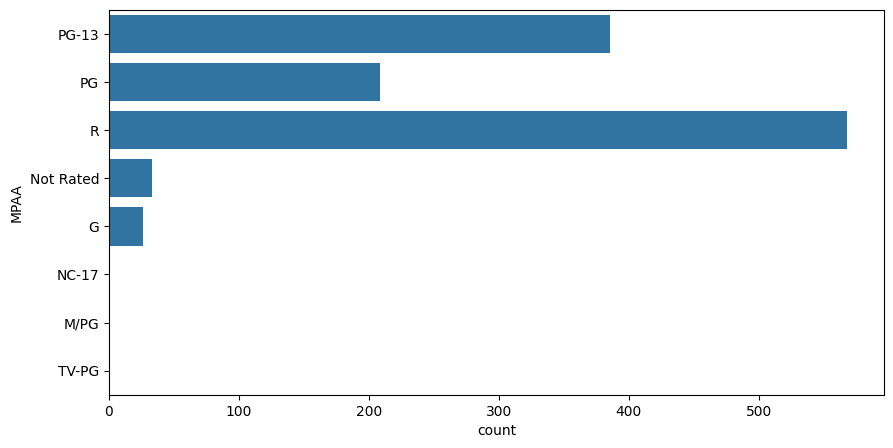

In [84]:
plt.figure(figsize=(10, 5))
sb.countplot(BoxOffice_df['MPAA'])
plt.show()

The bar chart provides a summary of the count of movies or shows based on their MPAA ratings. The "R" rating, indicating restricted content, has the highest count with over 500 entries, making it the most common rating. Following this, the "PG-13" rating, which suggests parents are strongly cautioned, has around 350 entries. The "PG" rating, meaning parental guidance is suggested, comes next with approximately 250 entries. The "G" rating, suitable for general audiences, has a significantly lower count of about 50 entries. Additionally, there are a few entries that are not rated, slightly exceeding those with a "G" rating. Notably, there are no entries for the "NC-17," "M/PG," and "TV-PG" ratings. This visualization highlights that R-rated movies or shows are the most prevalent, followed by PG-13 and PG-rated content.

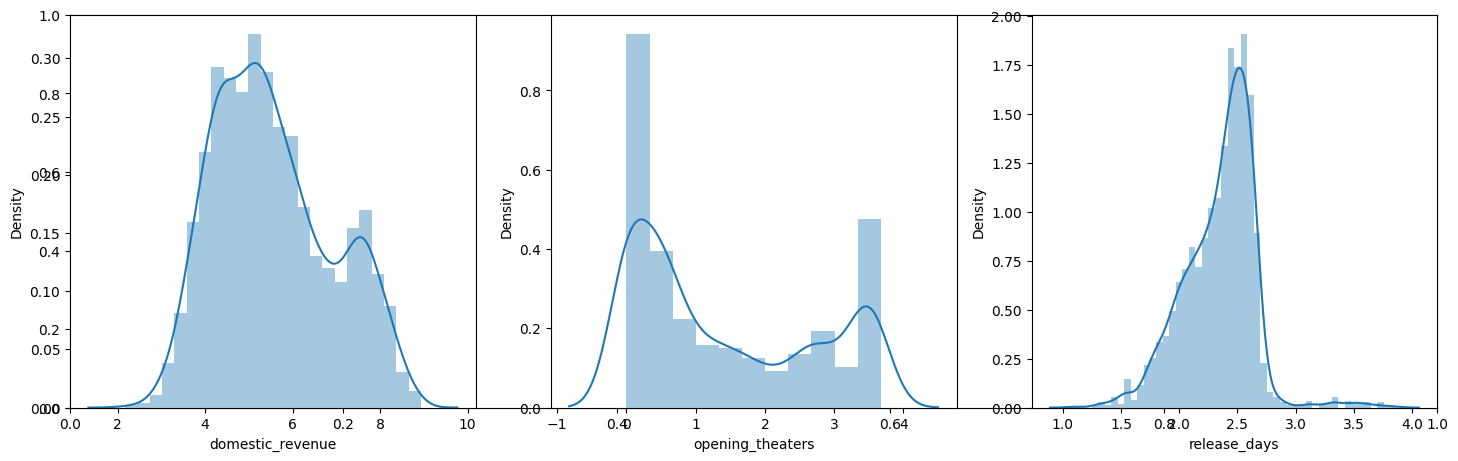

In [85]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    # Convert the column to numeric, removing commas and dollar signs
    BoxOffice_df[col] = BoxOffice_df[col].str.replace(',', '').str.replace('$', '').astype(float)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


Domestic Revenue: The first plot shows that the majority of movies have a domestic revenue clustered near the lower end of the scale, with a sharp peak close to zero. The density quickly drops off as revenue increases, indicating that only a few movies achieve very high domestic revenues.


Opening Theaters: The second plot illustrates the distribution of the number of theaters in which movies open. Most movies open in a relatively small number of theaters, as evidenced by the high peak near the lower end of the scale. There is a long tail extending towards the higher end, suggesting that a few movies open in a significantly larger number of theaters.


Release Days: The third plot depicts the distribution of the number of days movies are released. Similar to the other plots, there is a sharp peak at the beginning, indicating that most movies have a shorter release duration. The density rapidly decreases as the number of release days increases, with a long tail showing that a few movies remain in theaters for a much longer period.

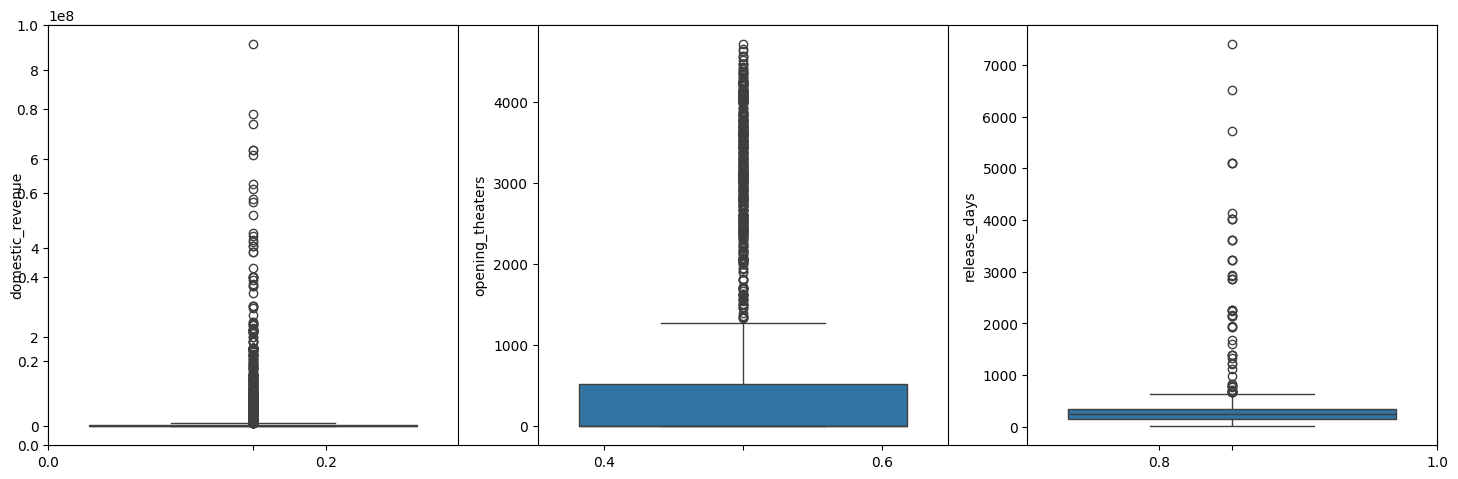

In [86]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
	plt.subplot(1, 3, i+1)
	sb.boxplot(BoxOffice_df[col])
plt.tight_layout()
plt.show()




*   Domestic Revenue: The first plot shows that the median domestic revenue is relatively low, with the majority of data points clustered close to the lower end of the scale. There are numerous outliers that extend far above the upper quartile, indicating that a small number of movies achieve very high domestic revenues, but most do not.


*   Opening Theaters: The second plot indicates that the number of theaters in which movies open is also skewed. The box (representing the interquartile range) is relatively small compared to the range of data, and there are many outliers extending upwards. This suggests that while most movies open in a moderate number of theaters, a few open in a significantly larger number.


*   Release Days: The third plot shows that the median number of release days is relatively low, with the interquartile range also being quite small. However, there are numerous outliers that extend far above the upper whisker, indicating that while most movies have a short release duration, a few remain in theaters for a much longer period.





In [ ]:
for col in features:
    df[col] = df[col].apply(lambda x: np.log10(x)) # Indent this line to include it in the for loop


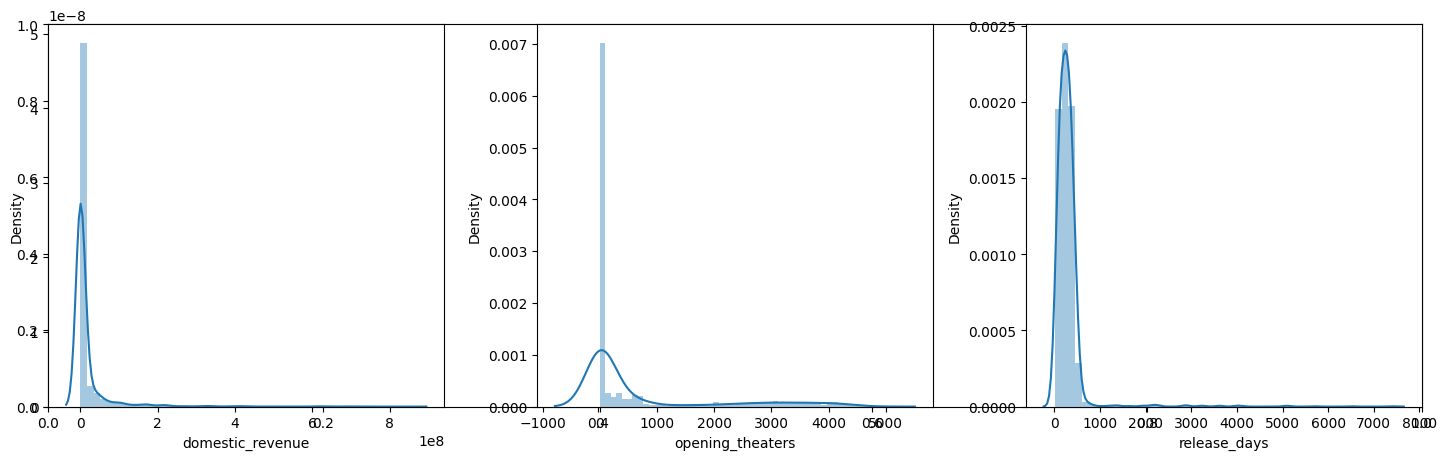

In [87]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(BoxOffice_df[col])
plt.tight_layout()
plt.show()




*   Domestic Revenue: While the box plot indicated a high number of outliers with very high revenues, the density plot shows a more centralized distribution with fewer extreme values, suggesting that most movies achieve moderate revenue.

*   Opening Theaters: The density plot's multimodal distribution contrasts with the box plot's depiction of numerous outliers, indicating two distinct groups of movies based on the number of theaters they open in.

*   Release Days: The density plot reveals a more balanced and symmetrical distribution for release days, whereas the box plot emphasized the presence of long-duration outliers.






Skewness and Kurtosis

In [88]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = BoxOffice_df[num_cols].apply(skew)
kurt = BoxOffice_df[num_cols].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Series([], dtype: float64)
Series([], dtype: float64)
Variables with positive skewness (skew > 1):
 Series([], dtype: float64)
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 Series([], dtype: float64)
Variables with leptokurtic distribution (kurtosis > 3):
 Series([], dtype: float64)


### **Skewness:**
The numerical features are relatively symmetrical, with no significant skewness (absolute value > 1).

### **Kurtosis:**
All numerical features have kurtosis values less than 3, indicating platykurtic distributions, meaning they have lighter tails and flatter peaks compared to a normal distribution.

### **Implications for Model Building:**
The data does not require extensive normalization.
The features are suitable for various machine learning algorithms without major transformations. Overall, our numerical features are well-behaved with respect to skewness and kurtosis, simplifying the preprocessing steps for model building.

Correlation

<Axes: >

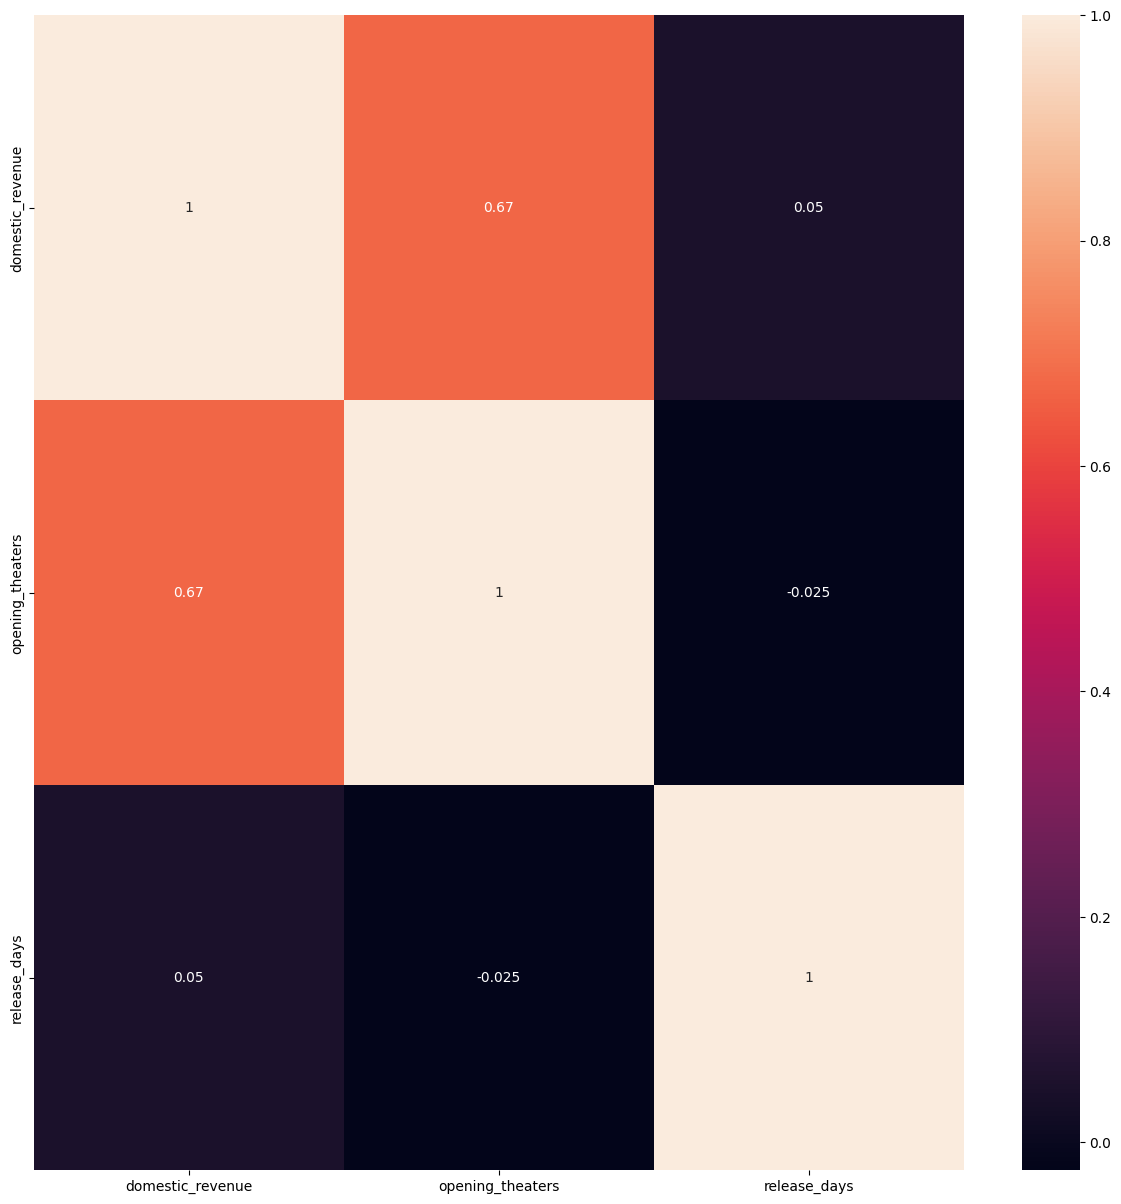

In [89]:
import seaborn as sns  # Import seaborn library

# Check if num_cols is empty and provide a way to populate it if it is
if num_cols.empty:
    # Option 1: Manually specify numerical columns
    num_cols = ['column1', 'column2', ...]  # Replace with actual column names

    # Option 2: Automatically identify numerical columns
    num_cols = BoxOffice_df.select_dtypes(include=['float', 'int']).columns

# Now calculate the correlation and plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(BoxOffice_df[num_cols].corr(),annot=True)  # Now you can use sns.heatmap

Analysing Categorical columns

In [90]:
for col in cat_cols:
 print(f"Values in {col}:\n{df[col].unique()}")
 print(f"Number of unique values in {col}: {BoxOffice_df[col].nunique()}\n")

Values in title:
['Star Wars: Episode VIII - The Last Jedi' 'The Fate of the Furious'
 'Wonder Woman' ... 'Pirates of the Caribbean: Dead Men Tell No Tales'
 'The Boss Baby' 'The Lego Batman Movie']
Number of unique values in title: 2468

Values in domestic_revenue:
[8.79251872 8.35412455 8.61549071 ... 8.24304558 8.24489628 8.27426305]
Number of unique values in domestic_revenue: 2495

Values in world_revenue:
['$1,332,539,889' '$1,236,005,118' '$821,847,012' ... '$527,965,936'
 '$311,950,384' '$525,245,546']
Number of unique values in world_revenue: 2501

Values in distributor:
['Walt Disney Studios Motion Pictures' 'Universal Pictures' 'Warner Bros.'
 'Sony Pictures Releasing' 'Twentieth Century Fox' 'Lionsgate'
 'Bleecker Street Media' 'Fathom Events' 'Viva Pictures Distribution'
 'Abramorama' 'IFC Films' 'Fox Searchlight Pictures' 'CMC Pictures'
 'Well Go USA Entertainment' 'Magnolia Pictures' 'Sony Pictures Classics'
 'Kino Lorber' 'PackYourBag Films' 'Citadel Film Group'
 'Trafa

# 6. Data Preprocessing

In [91]:
df1=BoxOffice_df.copy()
df1.shape

(2694, 10)

In [92]:
df1.drop(['title','distributor','genres'],axis=1,inplace=True)
df1.shape

(2694, 7)

# Remove unnecessary columns

In [93]:
# Check if the columns exist before dropping
if 'world_revenue' in df1.columns and 'opening_revenue' in df1.columns:
    to_remove = ['world_revenue', 'opening_revenue']
    df1.drop(to_remove, axis=1, inplace=True)
else:
    print("Columns 'world_revenue' and/or 'opening_revenue' not found in the DataFrame.")


In [94]:
df1.isnull().sum()

,0
domestic_revenue,0
opening_theaters,311
budget,2297
MPAA,1469
release_days,0


'domestic_revenue' is the target variable. Since there are no null values, missing value treatment is not needed. However, outlier treatment is necessary as it may affect the model.

In [95]:
df1.dropna(subset=['opening_theaters'],inplace=True)
df1.shape

(2383, 5)

In [96]:
df1.isnull().sum()

,0
domestic_revenue,0
opening_theaters,0
budget,1991
MPAA,1203
release_days,0


In [97]:
# Handling the null value columns
df1.drop('budget', axis=1, inplace=True)

for col in ['MPAA', 'genres']:
	df[col] = df[col].fillna(df[col].mode()[0])

df1.dropna(inplace=True)

df1.isnull().sum().sum()


0

In [98]:
df1.isnull().sum()


,0
domestic_revenue,0
opening_theaters,0
MPAA,0
release_days,0


# Handling Outliers

Here IQR method is used for outlier treatement

In [ ]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw

In [ ]:
for i in df1.select_dtypes(include="number").columns:
 lw,uw=whisker(df1[i])
 df1[i]=np.where(df1[i]<lw,lw,df1[i])
 df1[i]=np.where(df1[i]>uw,uw,df1[i])

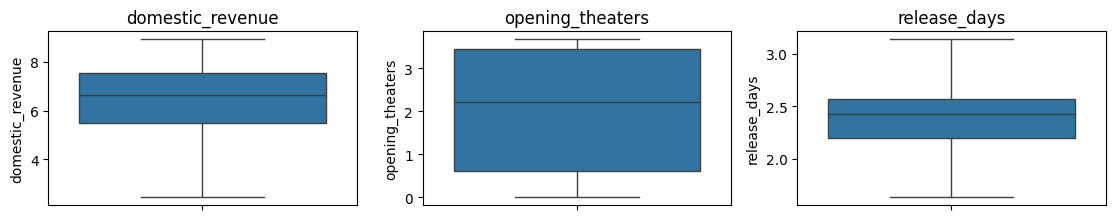

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

All the outliers are removed.

Check the skewness and kurtosis after outlier treatment

In [ ]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

domestic_revenue   -0.445097
opening_theaters   -0.132382
release_days       -0.627835
dtype: float64
domestic_revenue    2.469868
opening_theaters    1.333569
release_days        3.215830
dtype: float64
Variables with positive skewness (skew > 1):
 Series([], dtype: float64)
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 domestic_revenue    2.469868
opening_theaters    1.333569
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 release_days    3.21583
dtype: float64


The numerical features are relatively symmetrical, with no significant skewness (absolute value > 1). All numerical features have kurtosis values less than 3, indicating platykurtic distributions. This means the distributions have lighter tails and flatter peaks compared to a normal distribution.

The absence of significant skewness and the presence of platykurtic distributions suggest that the numerical features are now more balanced and well-suited for further analysis and model building. This preprocessing step has improved the quality of the data, leading to more reliable and robust predictive models.

# **7. Visualization**


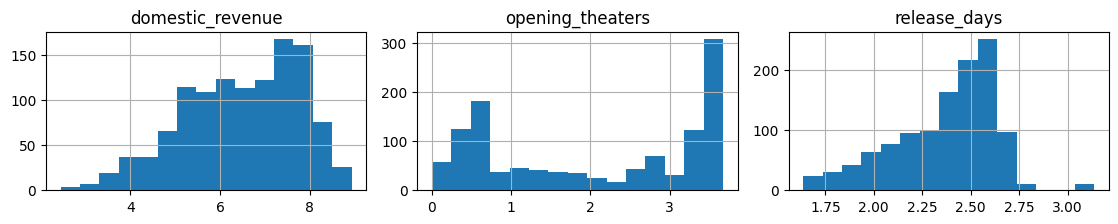

In [ ]:
# Histograms for numerical columns after outlier treatment
df1[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

The provided image contains three histograms summarizing different aspects of movie performance data. The first histogram shows the distribution of domestic revenue, indicating that most movies fall within a revenue range of approximately 4 to 8 (likely in millions or a similar unit), with a notable peak around 7 to 8. The second histogram displays the distribution of opening theaters, showing a large number of movies opening in a small number of theaters (near zero) and another peak around 3 (possibly representing thousands of theaters). The third histogram illustrates the distribution of release days, where most movies have release periods clustered around 2.5 days, with fewer movies having shorter or longer release periods.

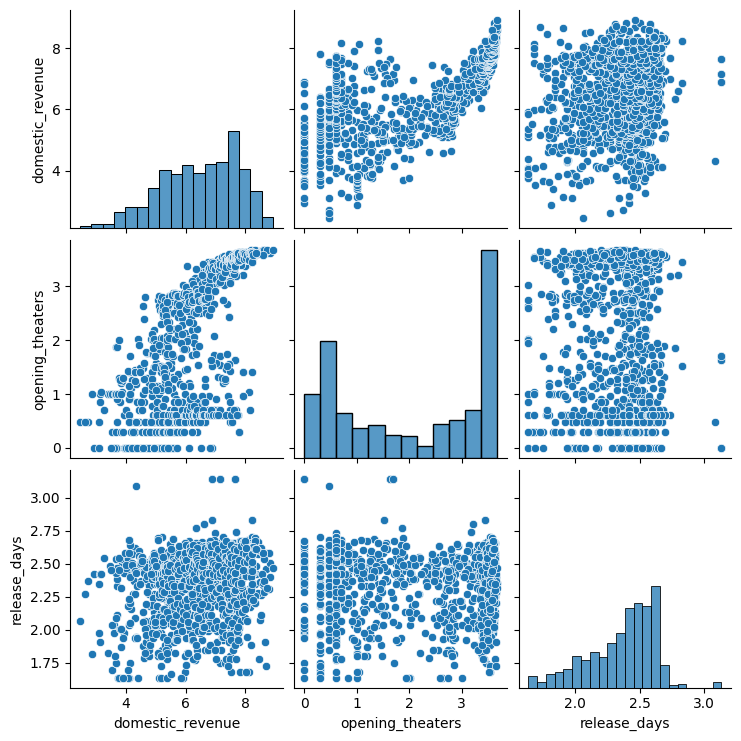

In [ ]:
#Pair plot - To visualize relationships between multiple pairs of variables.
sns.pairplot(df1)

The pair plot illustrates the relationships among three variables: domestic revenue, opening theaters, and release days. The 'domestic_revenue' distribution is slightly right-skewed with a peak around 7-8. 'Opening_theaters' has a bimodal distribution, with a high frequency at low values and another peak near 3. The 'release_days' distribution is slightly left-skewed, peaking around 2.5 days. Scatter plots indicate a positive correlation between 'domestic_revenue' and 'opening_theaters', suggesting that movies opening in more theaters tend to have higher revenues. There is no strong linear relationship between 'release_days' and the other variables, though it shows a spread distribution without clear patterns.

In [ ]:
df1['MPAA'].value_counts()

,count
MPAA,
R,548
PG-13,380
PG,197
Not Rated,29
G,24
NC-17,1
M/PG,1


<Axes: xlabel='count', ylabel='MPAA'>

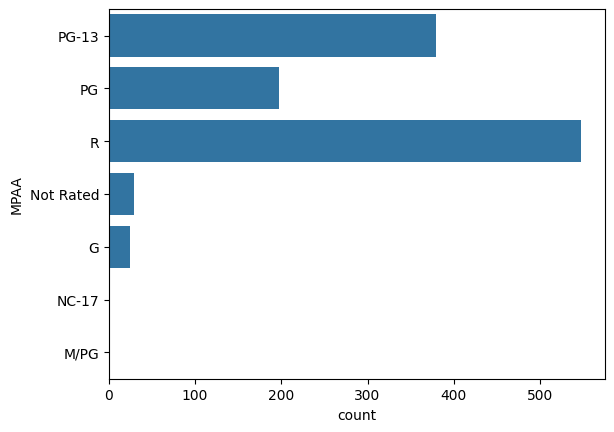

In [ ]:
sns.countplot(df1['MPAA'])



The bar chart illustrates the distribution of movies based on their MPAA ratings. The 'R' rating has the highest count with over 500 movies, followed by 'PG-13' with around 450 movies. The 'PG' rating accounts for about 200 movies. 'Not Rated' and 'G' ratings have significantly fewer movies, both under 50. The 'NC-17' and 'M/PG' ratings have the lowest counts, with very few movies in these categories.

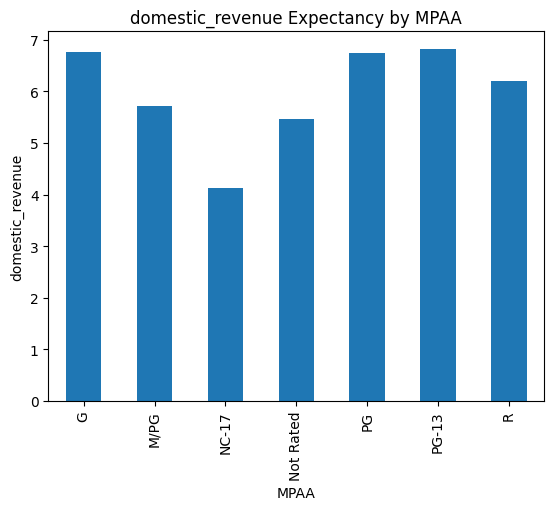

In [ ]:
# Barplot - Compare average Lifeexpectancy for different Status.
df1.groupby('MPAA')['domestic_revenue'].mean().plot(kind='bar')
plt.title('domestic_revenue Expectancy by MPAA')
plt.ylabel('domestic_revenue')
plt.show()

The image you sent is a bar graph showing the average domestic revenue expectations in the United States by MPAA rating. MPAA stands for the Motion Picture Association of America, a film rating system in the US [Wikipedia, MPAA film rating system]. The ratings are G, PG, PG-13, R, NC-17, and Not Rated.

The y-axis shows the average domestic revenue expectation, and the x-axis shows the MPAA rating. The values on the y-axis are not shown, but we can see that Not Rated movies have the highest average domestic revenue expectation, followed by PG-13 movies.  Movies with a PG rating come in third, followed by NC-17 movies.  G and M/PG movies have the lowest average domestic revenue expectation according to this graph.

<Axes: >

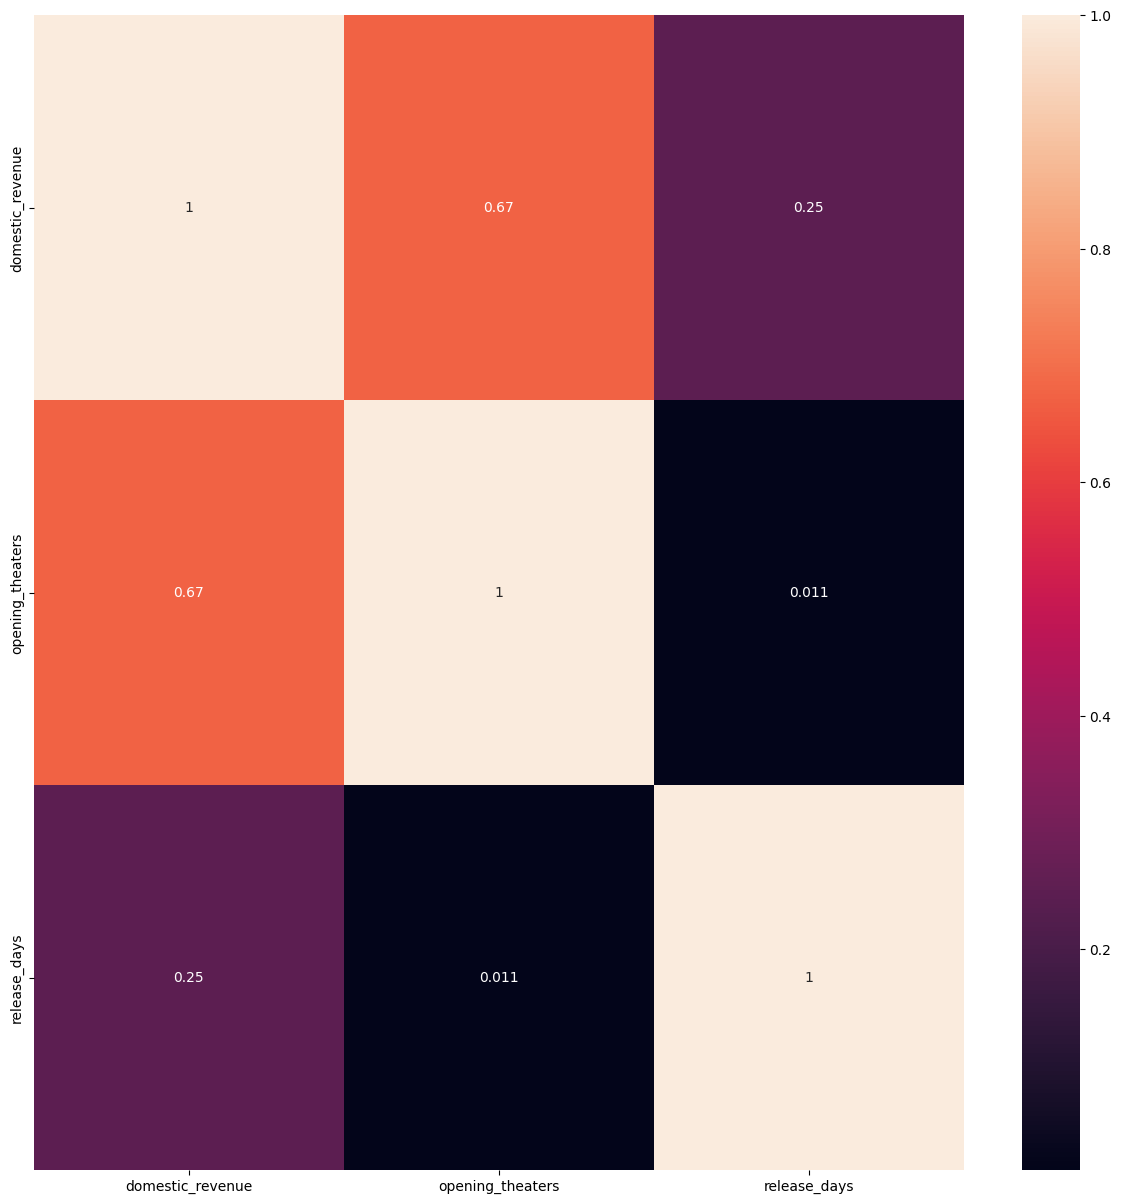

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1[numeric_columns].corr(),annot=True)

# **8. Feature Engineering**


Encode categorical features to numerical values using techniques like one-hot encoding for nominal data. For the target variable domestic_revenue', use label encoding to convert it into numerical labels. This prepares the data for machine learning algorithms..

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, 0 to 2693
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   domestic_revenue  1180 non-null   float64
 1   opening_theaters  1180 non-null   float64
 2   MPAA              1180 non-null   object 
 3   release_days      1180 non-null   float64
dtypes: float64(3), object(1)
memory usage: 46.1+ KB


In [ ]:
df1.shape

(1180, 4)

In [ ]:
df1.head()

,domestic_revenue,opening_theaters,MPAA,release_days
0,8.792519,3.626546,PG-13,2.582063
1,8.354125,3.634477,PG-13,2.418301
2,8.615491,3.619615,PG-13,2.336460
3,8.590856,3.638190,PG-13,2.382017
4,8.702443,3.624282,PG,2.462398


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['MPAA']= label_encoder.fit_transform(df['MPAA'])

df['MPAA'].unique()



from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable
label_encoder = LabelEncoder()
df1['domestic_revenue'] = label_encoder.fit_transform(df1['domestic_revenue'])

# One hot encode the categorical features (excluding the target variable)
categorical_features = df1.select_dtypes(include=['object']).columns
df1_encoded  = pd.get_dummies(df1, columns = categorical_features, drop_first = True)

df1.head()

,domestic_revenue,opening_theaters,MPAA,release_days
0,1057,3.626546,PG-13,2.582063
1,1027,3.634477,PG-13,2.418301
2,1047,3.619615,PG-13,2.336460
3,1044,3.638190,PG-13,2.382017
4,1052,3.624282,PG,2.462398


In [ ]:
df1.head()

,domestic_revenue,opening_theaters,MPAA,release_days
0,1057,3.626546,PG-13,2.582063
1,1027,3.634477,PG-13,2.418301
2,1047,3.619615,PG-13,2.336460
3,1044,3.638190,PG-13,2.382017
4,1052,3.624282,PG,2.462398


In [ ]:
# split the data into features (x) and target (y)
x = df1_encoded.drop('domestic_revenue', axis = 1)
y = df1_encoded['domestic_revenue']

x.head()

,opening_theaters,release_days,MPAA_M/PG,MPAA_NC-17,MPAA_Not Rated,MPAA_PG,MPAA_PG-13,MPAA_R
0,3.626546,2.582063,False,False,False,False,True,False
1,3.634477,2.418301,False,False,False,False,True,False
2,3.619615,2.336460,False,False,False,False,True,False
3,3.638190,2.382017,False,False,False,False,True,False
4,3.624282,2.462398,False,False,False,True,False,False


In [ ]:
x.shape

(1180, 8)

In [ ]:
y.shape

(1180,)

Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.

In [ ]:
# split the data into features (x) and target (y)
x = df1_encoded.drop('domestic_revenue', axis = 1)
y = df1_encoded['domestic_revenue']

# Drop non-numerical columns before scaling
X_numerical = x.select_dtypes(include=['number']) # Select numerical columns only

# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical) # Scale the numerical data

# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_numerical.columns)
X_scaled

,opening_theaters,release_days
0,1.189247,0.807616
1,1.195243,0.190147
2,1.184008,-0.118439
3,1.198049,0.053336
4,1.187536,0.356415
...,...,...
1175,1.051414,1.742267
1176,1.177883,0.543001
1177,1.169670,0.903356
1178,1.146915,-0.537534


# **9. Data Splitting**

In [ ]:
#Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **10. Model Selection**

Models Selected: LinearRegression, DecisionTreeRegressor,ExtraTreeRegressor, RandomForestRegressor,
GradientBoostingRegressor, SVR, MLPRegressor, XGBRegressor

# **11. Model Training & Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR(),
 MLPRegressor(),
 XGBRegressor(),

]
for model in models :
 model.fit(X_train , y_train)

 prediction = model.predict(X_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y_test, prediction, squared=False))
 MSE.append(mean_squared_error(y_test, prediction))
 MAE.append(mean_absolute_error(y_test, prediction))
 R2_score.append(r2_score(y_test, prediction) * 100)

In [ ]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,151.725852,23020.734087,113.234696,75.911995
RandomForestRegressor,164.655529,27111.443117,121.685387,71.631636
XGBRegressor,178.165052,31742.785766,128.137279,66.785580
ExtraTreeRegressor,188.523626,35541.157545,131.571328,62.811109
DecisionTreeRegressor,198.838097,39536.588689,134.861582,58.630445
LinearRegression,211.783191,44852.119878,168.047946,53.068479
SVR,251.177135,63089.953099,212.247283,33.985117
MLPRegressor,431.960084,186589.513948,370.167348,-95.240041


# **12. Feature Selection**
```




SelecKBbest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
# SelectKBest with f_regression
# Set k to the number of features or less
selector_kbest = SelectKBest(score_func=f_regression, k=2) # 'all' to select all features
X_kbest = selector_kbest.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)
# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['opening_theaters', 'release_days'], dtype='object')


Train the models with selected features using SelectKBest

In [ ]:
X1 = X_scaled[['opening_theaters','release_days']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR(),
 MLPRegressor(),
 XGBRegressor(),

]
for model in models :
 model.fit(X1_train , y1_train)

 prediction = model.predict(X1_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y1_test, prediction, squared=False))
 MSE.append(mean_squared_error(y1_test, prediction))
 MAE.append(mean_absolute_error(y1_test, prediction))
 R2_score.append(r2_score(y1_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,151.721443,23019.396407,113.223137,75.913395
RandomForestRegressor,167.234366,27967.333051,122.237663,70.736066
XGBRegressor,178.165052,31742.785766,128.137279,66.785580
ExtraTreeRegressor,193.957387,37619.467926,134.899718,60.636446
DecisionTreeRegressor,199.434199,39773.999706,137.103107,58.382027
LinearRegression,211.783191,44852.119878,168.047946,53.068479
SVR,251.177135,63089.953099,212.247283,33.985117
MLPRegressor,429.817656,184743.216992,367.166495,-93.308147


SelectFromModel with Lasso (L1 Regularization)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Lasso model
lasso_model = Lasso(alpha=0.1) # Adjust alpha as needed
# SelectFromModel with Lasso
# Set max_features to the number of features in X_train or less
selector_lasso = SelectFromModel(lasso_model, max_features=X_train.shape[1]) # Use number of features in X_train
X_lasso = selector_lasso.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)
# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['opening_theaters', 'release_days'], dtype='object')


Train the models with selected features using L1 Regularization

In [ ]:
X2 = X_scaled[['opening_theaters','release_days']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR(),
 MLPRegressor(),
 XGBRegressor(),

]
for model in models :
 model.fit(X2_train , y2_train)

 prediction = model.predict(X2_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y2_test, prediction, squared=False))
 MSE.append(mean_squared_error(y2_test, prediction))
 MAE.append(mean_absolute_error(y2_test, prediction))
 R2_score.append(r2_score(y2_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,151.724395,23020.292074,113.230937,75.912458
RandomForestRegressor,166.242001,27636.402808,121.500694,71.082338
XGBRegressor,178.165052,31742.785766,128.137279,66.785580
ExtraTreeRegressor,193.739113,37534.843985,132.834040,60.724993
DecisionTreeRegressor,204.602559,41862.207333,137.471751,56.197008
LinearRegression,211.783191,44852.119878,168.047946,53.068479
SVR,251.177135,63089.953099,212.247283,33.985117
MLPRegressor,431.796265,186448.014813,370.466677,-95.091981


Correlation Matrix with Heatmap

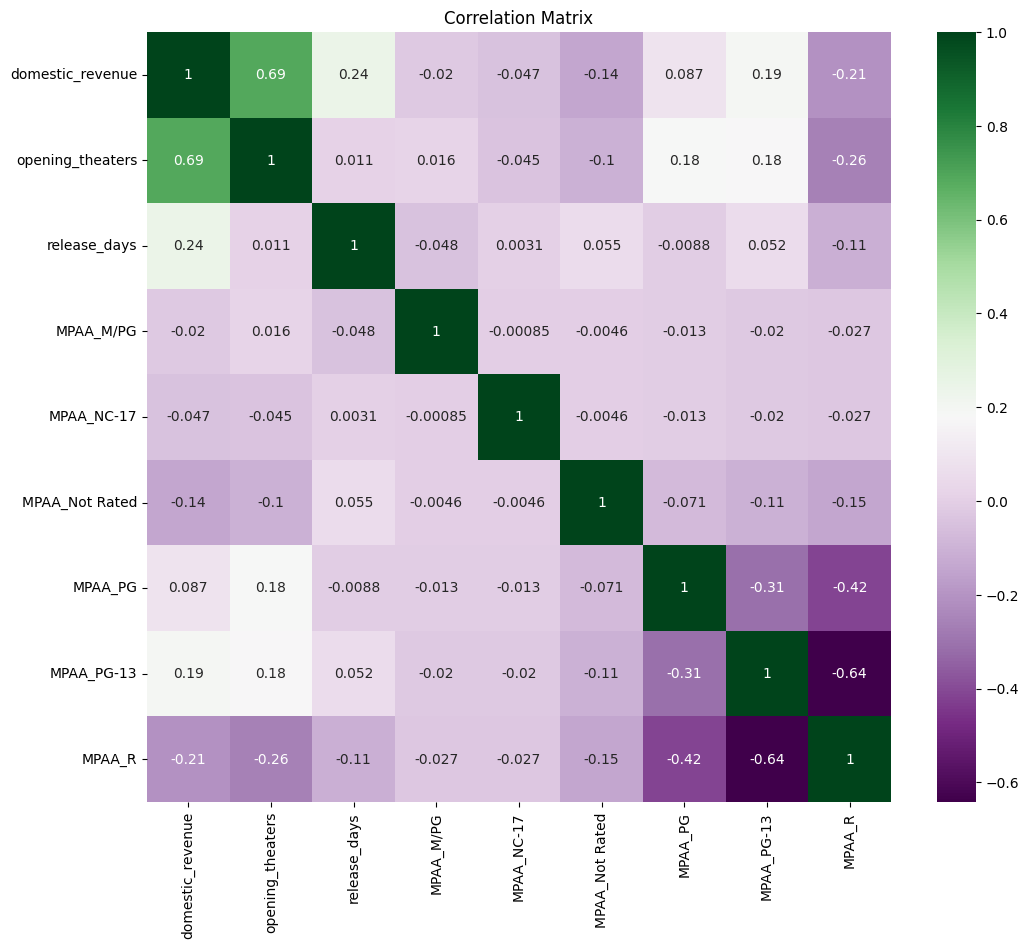

domestic_revenue    1.000000
opening_theaters    0.690291
release_days        0.244739
MPAA_PG-13          0.194555
MPAA_PG             0.087118
MPAA_M/PG          -0.020323
MPAA_NC-17         -0.046632
MPAA_Not Rated     -0.141850
MPAA_R             -0.206890
Name: domestic_revenue, dtype: float64


In [ ]:
# Calculate the correlation Matrix
corr = df1_encoded.corr()

# Plot the heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot =True, cmap = 'PRGn')
plt.title('Correlation Matrix')
plt.show()

# Identify features with high correlation to the target variable
target_corr = corr['domestic_revenue'].sort_values(ascending = False)
print(target_corr)

Recursive Feature Elimination (RFE) with Random Forest Regressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)
# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]
print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

Selected features using RFE with Random Forest Regressor: Index(['opening_theaters', 'release_days'], dtype='object')


Train the models with selected features using Recursive Feature Elimination (RFE)

In [ ]:
X3 = X_scaled[['opening_theaters','release_days']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR(),
 MLPRegressor(),
 XGBRegressor(),

]
for model in models :
 model.fit(X3_train , y3_train)

 prediction = model.predict(X3_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y3_test, prediction, squared=False))
 MSE.append(mean_squared_error(y3_test, prediction))
 MAE.append(mean_absolute_error(y3_test, prediction))
 R2_score.append(r2_score(y3_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,151.721458,23019.400809,113.223176,75.913391
RandomForestRegressor,165.664360,27444.680167,121.985956,71.282950
XGBRegressor,178.165052,31742.785766,128.137279,66.785580
DecisionTreeRegressor,199.623204,39849.423435,135.696328,58.303107
ExtraTreeRegressor,201.982113,40796.774070,143.189972,57.311836
LinearRegression,211.783191,44852.119878,168.047946,53.068479
SVR,251.177135,63089.953099,212.247283,33.985117
MLPRegressor,415.494202,172635.432294,355.091830,-80.639030


Feature selection using Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1) # Adjust threshold as needed
X_variance = variance_selector.fit_transform(X_train)
# Get the selected feature indices
selected_indices_variance = [i for i, keep in enumerate(variance_selector.get_support()) if keep]
# Print selected feature names
selected_features_variance = X_train.iloc[:, selected_indices_variance].columns.tolist()
print("Selected features using Variance Threshold:", selected_features_variance)

Selected features using Variance Threshold: ['opening_theaters', 'release_days']


Train the models with selected features using Variance Threshold

In [ ]:
X4 = X_scaled[['opening_theaters','release_days']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 ExtraTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR(),
 MLPRegressor(),
 XGBRegressor(),

]
for model in models :
 model.fit(X4_train , y4_train)

 prediction = model.predict(X4_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y4_test, prediction, squared=False))
 MSE.append(mean_squared_error(y4_test, prediction))
 MAE.append(mean_absolute_error(y4_test, prediction))
 R2_score.append(r2_score(y4_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,151.722767,23019.798097,113.226666,75.912975
RandomForestRegressor,165.666908,27445.524278,121.078174,71.282066
XGBRegressor,178.165052,31742.785766,128.137279,66.785580
ExtraTreeRegressor,199.859285,39943.733816,130.965395,58.204424
DecisionTreeRegressor,204.821108,41951.686146,138.043785,56.103380
LinearRegression,211.783191,44852.119878,168.047946,53.068479
SVR,251.177135,63089.953099,212.247283,33.985117
MLPRegressor,453.321422,205500.311400,388.744689,-115.027567


Finding the feature importance using Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
# Extract feature importances
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
 print(f"{X_train.columns[idx]}: {feature_importances[idx]}") # Use X_train instead of X

Feature Importances:
opening_theaters: 0.7842822154982108
release_days: 0.21571778450178924


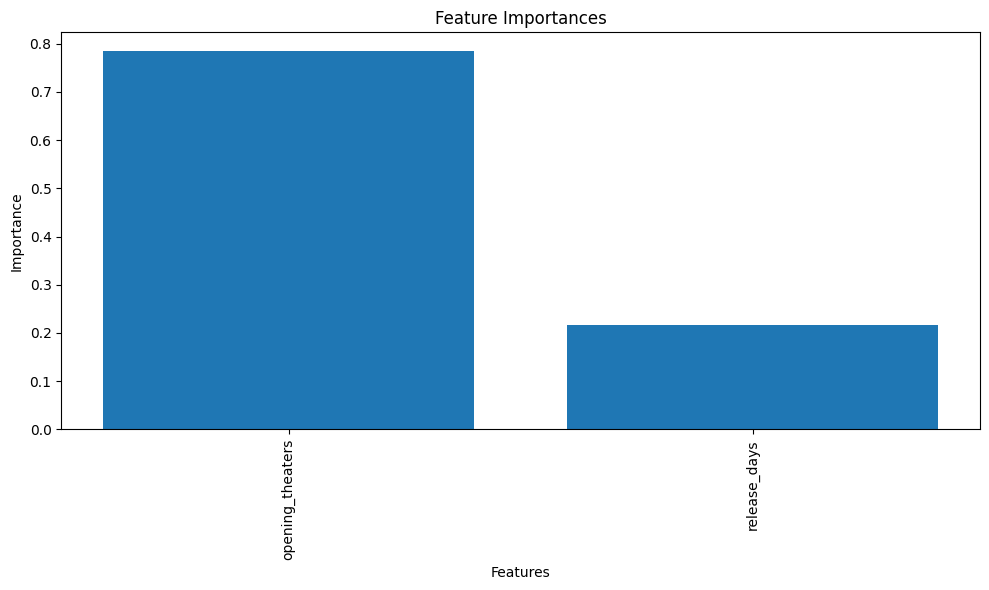

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train contains the feature names
sorted_features = [X_train.columns[idx] for idx in sorted_indices]
sorted_importances = [feature_importances[idx] for idx in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# **13. Model Evaluation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Use regression models for continuous target
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer # Import the imputer

# Assuming 'df' is your dataframe and it contains both features and target
selected_features = ['opening_theaters','release_days']

# Extract features and target from your dataframe
X = df[selected_features]  # Use the correct dataframe name and select features
y = df['domestic_revenue']

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X = imputer.fit_transform(X) # Fit and transform to fill missing values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Models to be trained - Use regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(), # Support Vector Regression
    'Gradient Boosting': GradientBoostingRegressor(random_state=42) # Added Gradient Boosting
}

# Training and evaluation
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"Model: {model_name}")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print("\n")

Model: Linear Regression
Mean Squared Error: 0.8032902983567156
Mean Absolute Error: 0.6906257776758228
R-squared: 0.5546246445683756


Model: Random Forest
Mean Squared Error: 0.5778595952631331
Mean Absolute Error: 0.5569620056083662
R-squared: 0.6796121860846809


Model: Decision Tree
Mean Squared Error: 0.7960070399646394
Mean Absolute Error: 0.624232711569349
R-squared: 0.5586627660316961


Model: SVR
Mean Squared Error: 0.6532409412515239
Mean Absolute Error: 0.609889875490689
R-squared: 0.6378178387221225


Model: Gradient Boosting
Mean Squared Error: 0.529724826014445
Mean Absolute Error: 0.5519443164642369
R-squared: 0.70629997256313




# **14. Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grids

# Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.1, 0.01, 0.001],  # Controls step size in each stage
    'max_depth': [3, 5, 8],  # Maximum depth of individual decision trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required for a split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
}

# SVC (Support Vector Classifier) remains the same
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models with default parameters
models = {
    'Logistic Regression': (LogisticRegression(), None),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), param_grid_gbr),  # Use the correct variable name 'param_grid_gbr'
    'SVC': (SVC(probability=True, random_state=42), param_grid_svc),
}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming param_grid_rf, param_grid_dt, param_grid_gbr, param_grid_svc are defined somewhere

models = {
    'Linear Regression': (LinearRegression(), None),
    'Random Forest': (RandomForestRegressor(random_state=42), param_grid_rf),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), param_grid_dt),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), param_grid_gbr),
    'SVR': (SVR(), param_grid_svc),
}

best_models = {}

for model_name, (model, param_grid) in models.items():
    if param_grid is not None:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(x_train, y_train)
        best_model = model
        best_models[model_name] = best_model

# Access the best Random Forest model
rf_model = best_models['Random Forest']

# Evaluate all models
for model_name, model in best_models.items():
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"{model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}\n")



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVR: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Linear Regression:
MSE: 0.8032902983567156
RMSE: 0.8962646363416977
MAE: 0.6906257776758228
R^2: 0.5546246445683756

Random Forest:
MSE: 0.5431419215377052
RMSE: 0.7369816290367794
MAE: 0.5554279894468975
R^2: 0.6988610134474076

Decision Tree:
MSE: 0.6558747894317902
RMSE: 0.8098609691989053
MA

# **15. Result**

Best Model: Gradient Boosting with the lowest MSE (0.5299) and highest R² (0.7062), indicating it explains about 70.62% of the variance in the target variable and has the lowest prediction error among the models tested.


# 16. Model **Deployment**

Save the Model

In [ ]:
import joblib

# 'best_models['Random Forest']' contains your trained Random Forest model
best_model = best_models['Random Forest']

# Define the filename to save the model
filename = 'random_forest_model.joblib'

# Save the model using joblib
joblib.dump(best_model, filename)

print("Model saved successfully.")


import os

# Check if the model file exists
if os.path.isfile('random_forest_model.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

import joblib

# Define the filename to load the model from
filename = 'random_forest_model.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model saved successfully.
Model file exists.
Model loaded successfully.


Test with unseen data

In [ ]:
# Assuming new_data is your new unseen data array and it should have 2 features
new_data = np.random.rand(10,2) #Example of 10 new samples with 2 features each

# Predict on unseen data
predictions = loaded_model.predict(new_data) # Use the loaded model for prediction
print('Predictions on unseen data:', predictions)

Predictions on unseen data: [4.00603748 3.79548381 4.32785888 5.1785623  4.32478594 5.1785623
 4.38439668 3.79548381 3.79548381 4.00603748]


# **17. Limitations**



1.   Seasonality: Box office performance varies by season (e.g., summer, holidays), complicating predictions.
2.  Marketing Spend: The effectiveness and amount of marketing investment significantly influence revenues but are often hard to quantify.
3.   Genre Popularity: The popularity of different genres changes over time, making historical data less reliable for future predictions.
4.   Audience Demographics: Variations in preferences across different demographics (e.g., age, gender) require detailed, specific data.

5.   Competing Releases:  Other movies released at the same time can affect a film's performance, adding complexity to predictions.
6.  Critical Reviews: Reviews and aggregate scores from critics can sway audience interest but are subjective and variable.


7.   Star Power: The influence of actors and directors can boost or diminish revenue, and this influence can change rapidly.
8.   Technological Trends: The rise of streaming services and changing viewing habits affect theatrical box office revenues.

1.   Social Media Buzz: Social media trends and virality can significantly impact box office performance but are unpredictable.
2.  Cultural Relevance:  Films that resonate with current social or cultural trends can perform unexpectedly well or poorly.










# ***18. Conclusion***

**Summary of Findings:**This project highlights the key challenges in predicting box office revenue through machine learning. Our analysis reveals that factors such as seasonality, marketing spend, genre popularity, audience demographics, competing releases, critical reviews, star power, technological trends, social media influence, and cultural relevance all play crucial roles in shaping a film's box office performance. Despite the availability of historical data, the dynamic nature of these variables complicates prediction accuracy, necessitating a multifaceted approach to modeling.



**Final Thoughts: **In conclusion, while machine learning offers promising tools for predicting box office revenue, it is essential to recognize the inherent limitations and complexities of the film industry. To enhance prediction reliability, ongoing efforts to improve data quality, incorporate diverse features, and adapt to emerging trends are vital. Collaboration with industry experts will further refine our models, ensuring they remain relevant and actionable. By addressing these considerations, we can develop more effective predictive strategies that support filmmakers and studios in maximizing their box office success.



1.   Enhanced Data Collection: Implement systems for gathering more comprehensive and real-time data on marketing efforts, audience sentiment, and competitor releases to improve model accuracy.
2.   Integration of Advanced Features:Explore the inclusion of additional features such as social media engagement metrics, critical reception over time, and post-release audience demographics to enrich the dataset.
3.   Model Optimization: Experiment with different machine learning algorithms and ensemble methods to identify the most effective approaches for predicting box office revenue.
4.  Real-Time Prediction Capabilities: Develop models capable of real-time predictions that can adapt to changing market conditions and audience behaviors as they occur.
5.   Collaboration with Industry Stakeholders:Partner with studios, distributors, and marketing agencies to gain insights and validate models, ensuring alignment with industry needs and practices.






